In [41]:
import pandas as pd
df_video = pd.read_csv("Data\TriedRefusedProductions_data.csv")
df_trans = pd.read_csv("Data\Tried and Refuse Production.csv")
df_video.columns , df_trans.columns

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\singh\AppData\Local\Temp\ipykernel_18476\2269905736.py:2: SyntaxWarning: invalid escape sequence '\T'
  df_video = pd.read_csv("Data\TriedRefusedProductions_data.csv")
C:\Users\singh\AppData\Local\Temp\ipykernel_18476\2269905736.py:3: SyntaxWarning: invalid escape sequence '\T'
  df_trans = pd.read_csv("Data\Tried and Refuse Production.csv")


(Index(['Unnamed: 0', 'videoId', 'title', 'description', 'thumbnail', 'addedAt',
        'viewCount', 'likeCount', 'commentCount'],
       dtype='object'),
 Index(['Unnamed: 0', 'video link', 'video code', 'video text', 'words spoken',
        'video length', 'video title', 'video views'],
       dtype='object'))

In [42]:
df_video.drop_duplicates(subset=['videoId'] , keep="first" , inplace= True)

In [43]:
df_video[df_video["videoId"] == '4vlmRcXdo1A']

,Unnamed: 0,videoId,title,description,thumbnail,addedAt,viewCount,likeCount,commentCount
1034,1034,4vlmRcXdo1A,Breathe: Into The Shadows Web Series Review & ...,#BreatheIntoTheShadows is here on #AmazonPrime...,https://i.ytimg.com/vi/4vlmRcXdo1A/sddefault.jpg,2020-07-10T09:25:25Z,218212.0,8246.0,1117.0


In [44]:
df_video.drop(columns=['Unnamed: 0' , 'title'] , inplace= True)
df_trans.drop(columns=['Unnamed: 0' , 'video views' ] , inplace= True)

In [45]:
df_trans.shape , df_video.shape

((1290, 6), (1592, 7))

In [46]:
df_trans = df_trans.merge(df_video , left_on='video code', right_on='videoId' , how='inner')
df_trans.shape

(1290, 13)

In [47]:
df_trans.sample(2)

,video link,video code,video text,words spoken,video length,video title,videoId,description,thumbnail,addedAt,viewCount,likeCount,commentCount
788,https://www.youtube.com/watch?v=9SRXVVhWDSg,9SRXVVhWDSg,is Justice Pushpa Ganesh ji wala hearts and dr...,772,552,Problematic Bollywood Movies Are Still India’s...,9SRXVVhWDSg,#Bollywood movies have had a history of conten...,https://i.ytimg.com/vi/9SRXVVhWDSg/sddefault.jpg,2021-03-03T09:19:57Z,418436.0,24499.0,2586.0
303,https://www.youtube.com/watch?v=hbiaPCfrDk8,hbiaPCfrDk8,you know the stories are more than just sex sc...,1401,443,Lust Stories 2 Review & Analysis | Ranking Fro...,hbiaPCfrDk8,With the anthology #Luststories2 making the ro...,https://i.ytimg.com/vi/hbiaPCfrDk8/sddefault.jpg,2023-06-30T06:29:19Z,453313.0,8915.0,776.0


### Preprocessing of text

In [9]:
from nltk import sent_tokenize , word_tokenize
import pandas as pd
import numpy as np


In [10]:
import string
import re

# Removing HTML
def remove_html_tag(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'' , text)

# [Music] --> remove
def remove_music_tags(text):
    pattern = re.compile('[.*?]')
    return pattern.sub(r'' , text)

# Remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'',text)

# Removing punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)
exclude = string.punctuation
def remove_pun(text):
    return text.translate(str.maketrans("" , "" , exclude))

def lower_text(text):
    return text.lower()


df_trans['video text'] = df_trans['video text'].apply(remove_html_tag)
df_trans['video text'] = df_trans['video text'].apply(remove_pun)
df_trans['video text'] = df_trans['video text'].apply(remove_music_tags)
df_trans['video text'] = df_trans['video text'].apply(remove_emojis)
df_trans['video text'] = df_trans['video text'].apply(lower_text)

In [11]:
import tqdm
vocab = set()

for vid_text in tqdm.tqdm(df_trans['video text'], desc="making vocab"):
    vocab.update(word_tokenize(vid_text))


making vocab: 100%|██████████| 1290/1290 [00:03<00:00, 331.79it/s]


In [12]:
temp_list = list(vocab)

a = sorted(temp_list , key= lambda x: len(x) , reverse= True)
# largest_word = temp_list[0]
# for word in temp_list:
#     if len(word) > len(largest_word):
#         largest_word = word
        
print(a[:20]) #pseudohermaphrodite

['astagfirullahaladzim', 'mujadukudsamajnayara', 'governmentcontrolled', 'performanceoriented', 'pseudohermaphrodite', 'mentallychallenged', 'disenfranchisement', 'bollywoodification', 'conversationalists', 'oversimplification', 'interconnectedness', 'nonconfrontational', 'postliberalization', 'universityeducated', 'telecommunications', 'characterizations', 'nostringsattached', 'consumerismdriven', 'conscientiousness', 'commercialization']


In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width = 600 , height = 600 , background_color = 'black' , min_font_size = 10 )

word_cloud = wc.generate(df_trans['video text'].str.cat(sep = ' '))

plt.show(word_cloud)

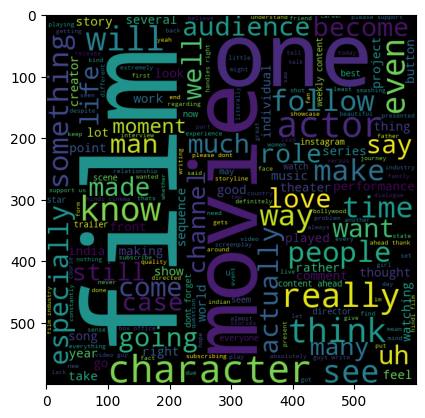

In [15]:
plt.imshow(word_cloud)

In [16]:
# Creating Word Tokeniser 
corpus = []

for vid_text in tqdm.tqdm(df_trans['video text'], desc="making vocab"):
    corpus.extend(word_tokenize(vid_text))

making vocab: 100%|██████████| 1290/1290 [00:03<00:00, 348.56it/s]


In [17]:
from collections import Counter

all_words = Counter(corpus)
print(all_words.most_common(10))

[('the', 129306), ('and', 62705), ('of', 57463), ('to', 48952), ('a', 48856), ('in', 43792), ('that', 36539), ('is', 33649), ('i', 21479), ('you', 21128)]


6


<BarContainer object of 6 artists>

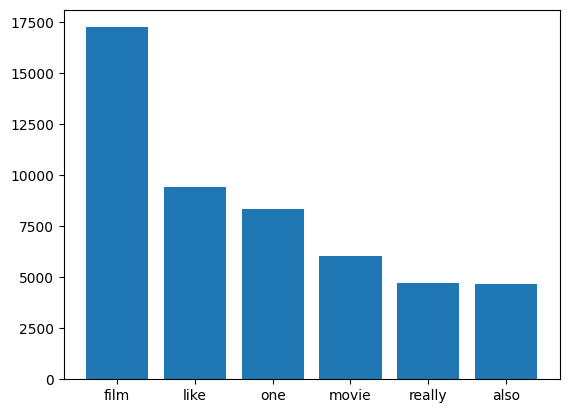

In [ ]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

stopwords = stopwords.words("english")


words = [word for word in all_words.most_common(50) if word[0] not in stopwords]

print(len(words))
word = [word[0] for word in words ]
freq = [word[1] for word in words ]
plt.bar(word , freq , align= "center")

In [ ]:
# Date releted data
def clean_datetime_columns(datetime):
    return datetime.replace("T" , " ").replace("Z" , "")


df_trans.sample(10)
df_trans['addedAt'] = df_trans['addedAt'].apply(clean_datetime_columns)
df_trans['addedAt'] = pd.to_datetime(df_trans['addedAt'] , errors="raise" , format='%Y-%m-%d %H:%M:%S')
df_trans.sample(5)

,video link,video code,video text,words spoken,video length,video title,videoId,description,thumbnail,addedAt,viewCount,likeCount,commentCount
283,https://www.youtube.com/watch?v=pYrj1J4JS2s,pYrj1J4JS2s,okay [Music] I've been wondering about the Mac...,1170,392,Do Bollywood Celebrities FAKE Being Relatable?,pYrj1J4JS2s,I wanted to uncover the case of #bollywood PR ...,https://i.ytimg.com/vi/pYrj1J4JS2s/sddefault.jpg,2023-08-04 06:37:42,664189.0,18474.0,1398.0
514,https://www.youtube.com/watch?v=VrWhjaoLelM,VrWhjaoLelM,i told you what did i tell you didn't i tell y...,1393,433,I Regret Not Watching This Beautiful Indian Mo...,VrWhjaoLelM,I really do regret not being able to watch #an...,https://i.ytimg.com/vi/VrWhjaoLelM/sddefault.jpg,2022-07-11 08:48:53,238771.0,9612.0,1090.0
426,https://www.youtube.com/watch?v=sLTk0UDMavU,sLTk0UDMavU,foreign A very wise person from the film indus...,1142,363,Cirkus Trailer Review & Is The Comedy Really T...,sLTk0UDMavU,The biggest release and the end of Bollywood's...,https://i.ytimg.com/vi/sLTk0UDMavU/sddefault.jpg,2022-12-02 10:01:29,173715.0,5942.0,996.0
1142,https://www.youtube.com/watch?v=Ks4zhS4Tz1M,Ks4zhS4Tz1M,it's been close to one and a half months in th...,822,232,5 Amazing Bollywood Movie Performances In 2018...,Ks4zhS4Tz1M,There are some performances that are constantl...,https://i.ytimg.com/vi/Ks4zhS4Tz1M/sddefault.jpg,2018-02-14 10:30:52,195023.0,3314.0,248.0
160,https://www.youtube.com/watch?v=a2lHVgkIP6g,a2lHVgkIP6g,everyone can't be bubl for the rest of their l...,2122,711,The Dark Reality Of Bollywood Stardom!,a2lHVgkIP6g,The most difficult thing to get used to workin...,https://i.ytimg.com/vi/a2lHVgkIP6g/sddefault.jpg,2024-02-29 03:17:20,494604.0,11368.0,1007.0


In [56]:
# Word Speed 
def calculate_word_speed(row):
    word_speed = np.round(row['words spoken']/(row['video length'])*60,2)
    return word_speed

df_trans['word_speed'] = df_trans.apply(calculate_word_speed, axis = 1)

In [72]:
# avg speed for that year
df_trans["video_year"] = df_trans.addedAt.dt.year
df_group_by = df_trans.groupby(by= "video_year")['word_speed'].mean()

array([148.09428571, 159.62068966, 185.2304    , 193.13886598,
       167.75982036, 166.48088398, 190.10751131, 184.43328767,
       177.91426136, 178.47176471])

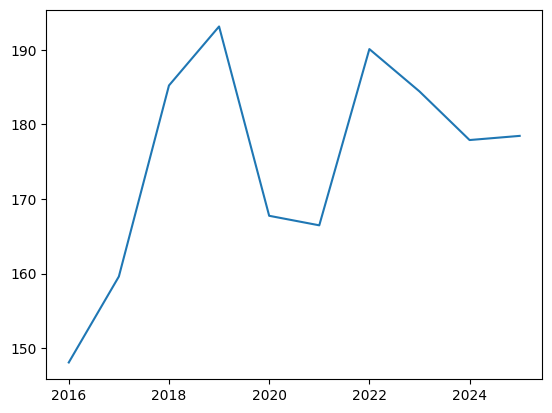

In [80]:
x_data = df_trans['addedAt'].dt.year

# Use plt.plot() to create the plot
plt.plot(df_group_by.index, df_group_by.values)
